<a href="https://colab.research.google.com/github/Gayatri2912/22BDS0126/blob/main/22bds0126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1 – Dataset Load & Basic Info
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
df = pd.read_csv(url)
# quick peek
df.head()


,rownames,state,year,miles,fatalities,seatbelt,speed65,speed70,drinkage,alcohol,income,age,enforce
0,1,AK,1983,3358,0.044669,NaN,no,no,yes,no,17973,28.234966,no
1,2,AK,1984,3589,0.037336,NaN,no,no,yes,no,18093,28.343542,no
2,3,AK,1985,3840,0.033073,NaN,no,no,yes,no,18925,28.372816,no
3,4,AK,1986,4008,0.025200,NaN,no,no,yes,no,18466,28.396652,no
4,5,AK,1987,3900,0.019487,NaN,no,no,yes,no,18021,28.453251,no


In [ ]:
#Step 2 – Dimensions
print("Shape of dataset:", df.shape)


Shape of dataset: (765, 13)


In [ ]:
#Step 3 – Summary Statistics
# Info about columns
df.info()

# Summary for numeric columns
df.describe()

# Summary for categorical columns
df.describe(include=['object'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    765 non-null    int64  
 1   state       765 non-null    object 
 2   year        765 non-null    int64  
 3   miles       765 non-null    int64  
 4   fatalities  765 non-null    float64
 5   seatbelt    556 non-null    float64
 6   speed65     765 non-null    object 
 7   speed70     765 non-null    object 
 8   drinkage    765 non-null    object 
 9   alcohol     765 non-null    object 
 10  income      765 non-null    int64  
 11  age         765 non-null    float64
 12  enforce     765 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 77.8+ KB


,state,speed65,speed70,drinkage,alcohol,enforce
count,765,765,765,765,765,765
unique,51,2,2,2,2,3
top,AK,yes,no,yes,no,secondary
freq,15,494,711,677,676,379


In [ ]:
#Step 4 – Data Handling (Missing Values)
# Count missing values in each column
df.isnull().sum()

# Percentage of missing values
df.isnull().mean() * 100


,0
rownames,0.000000
state,0.000000
year,0.000000
miles,0.000000
fatalities,0.000000
seatbelt,27.320261
speed65,0.000000
speed70,0.000000
drinkage,0.000000
alcohol,0.000000


In [ ]:
#Step 5 - Drop missing rows if any
df = df.dropna(subset=['seatbelt'])


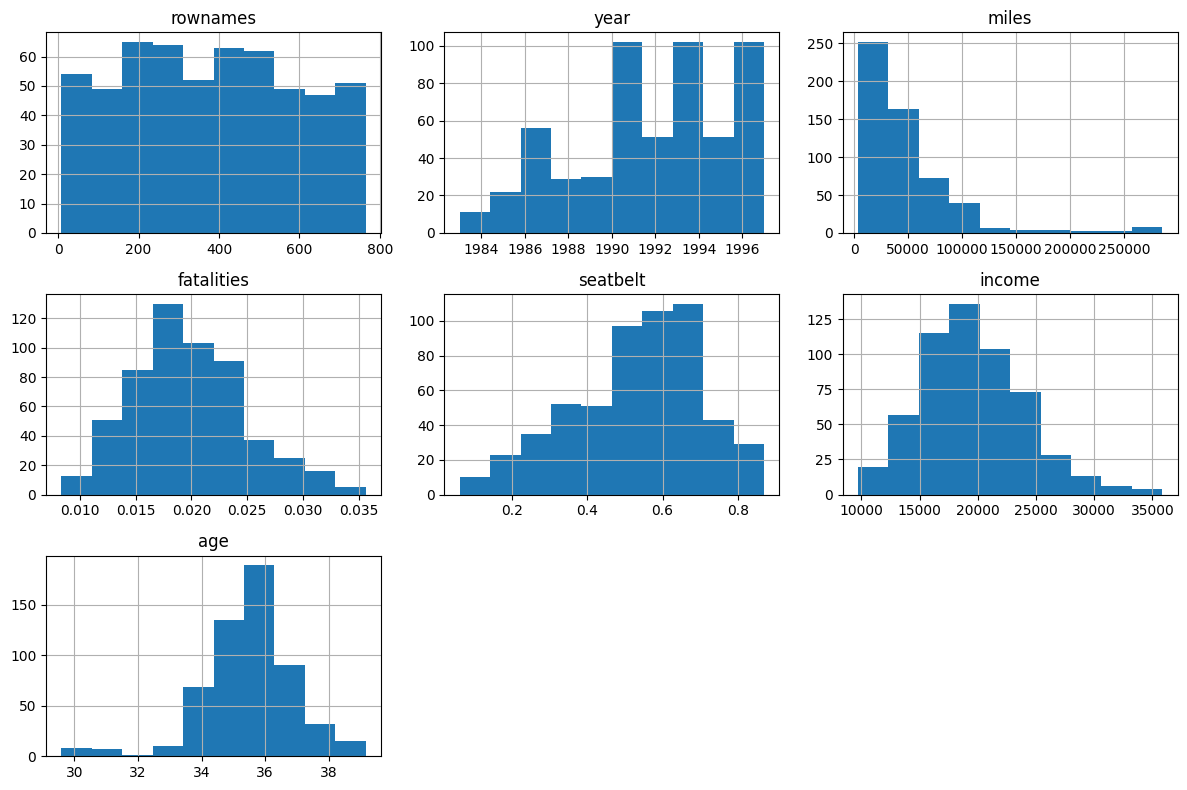

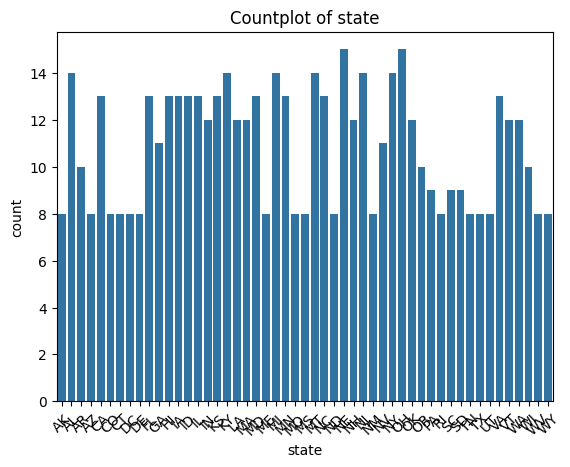

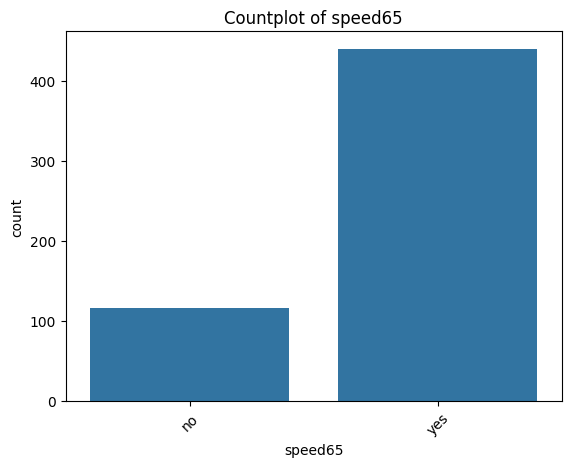

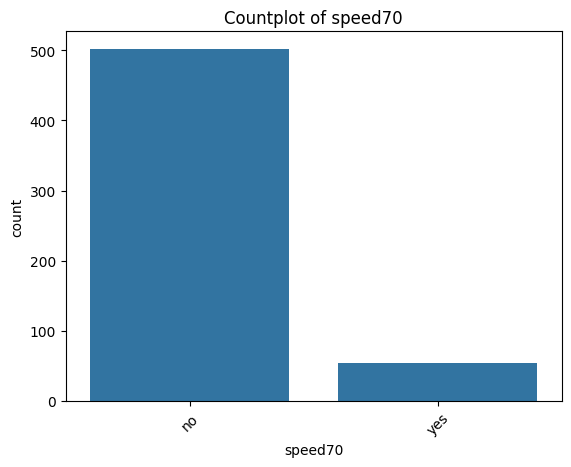

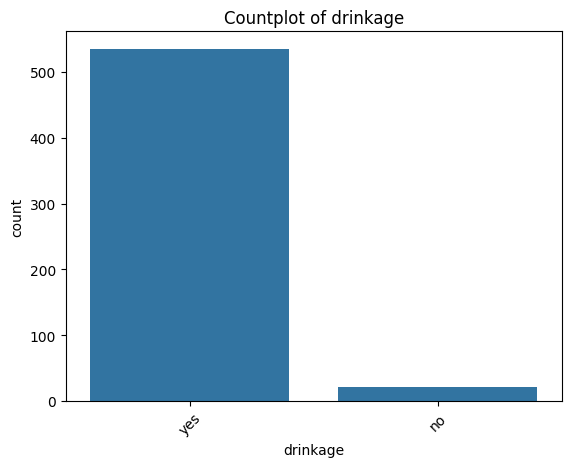

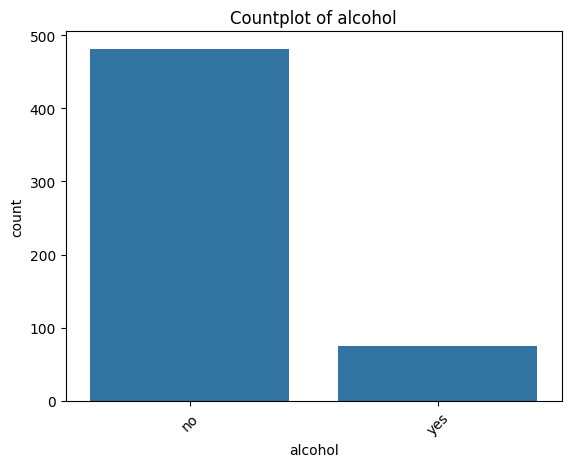

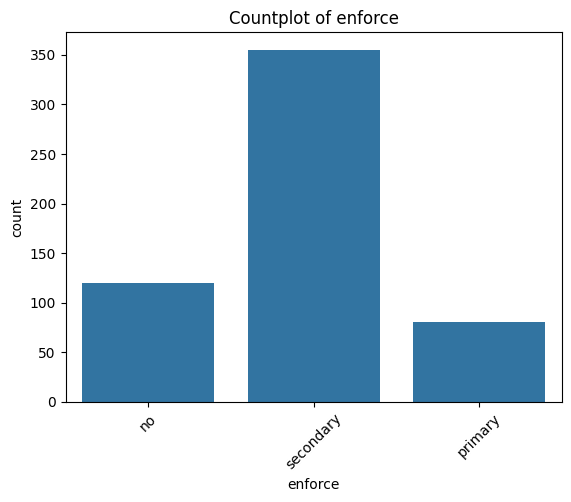

In [ ]:
#Step 6 – Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numeric columns
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Countplot for categorical columns
categorical_cols = df.select_dtypes(exclude='number').columns
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()


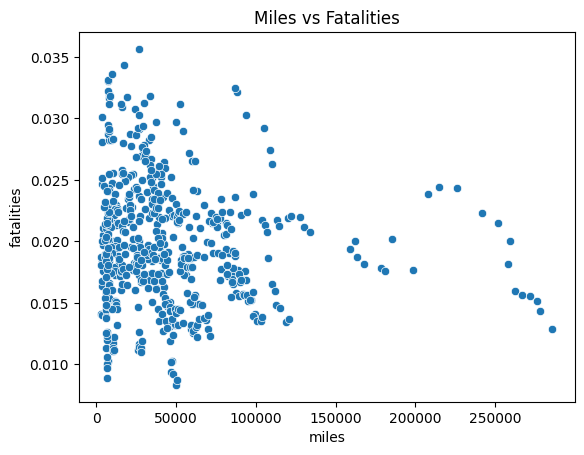

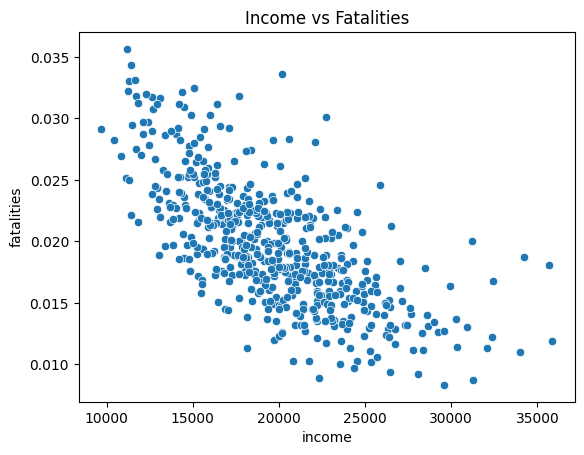

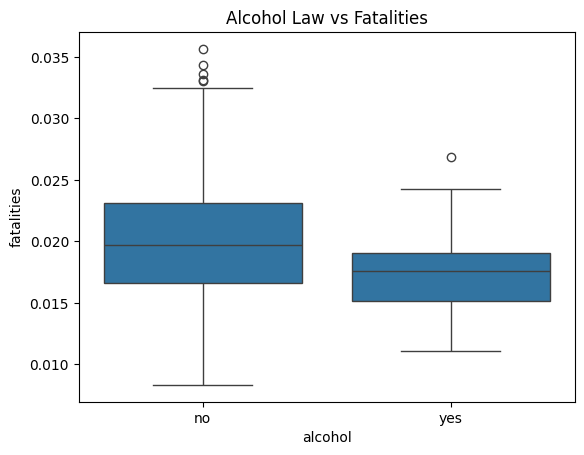

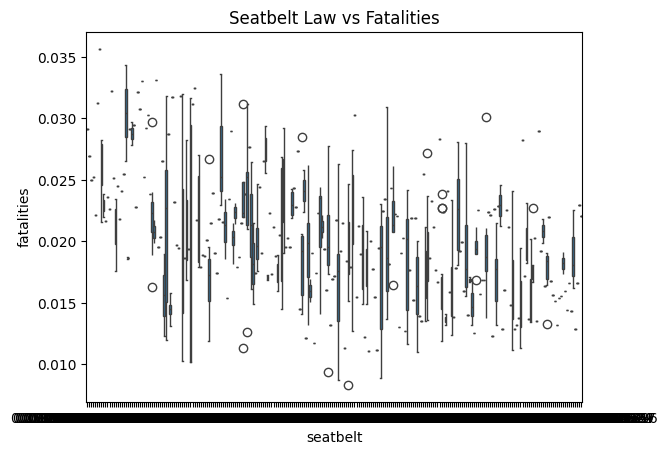

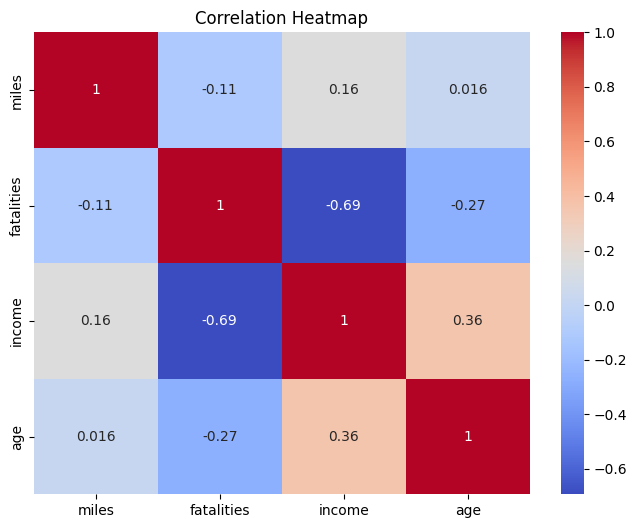

enforce   no  primary  secondary
alcohol                         
no       104       63        314
yes       16       18         41
alcohol   no  yes
seatbelt         
0.060      1    0
0.070      1    0
0.090      1    0
0.099      1    0
0.110      1    0
...       ..  ...
0.850      0    3
0.852      0    1
0.853      1    0
0.860      0    1
0.870      0    1

[245 rows x 2 columns]


In [ ]:
#Step 7 – Bivariate Analysis
# Scatterplots
sns.scatterplot(x='miles', y='fatalities', data=df)
plt.title("Miles vs Fatalities")
plt.show()

sns.scatterplot(x='income', y='fatalities', data=df)
plt.title("Income vs Fatalities")
plt.show()

# Boxplots (Categorical vs Numeric)
sns.boxplot(x='alcohol', y='fatalities', data=df)
plt.title("Alcohol Law vs Fatalities")
plt.show()

sns.boxplot(x='seatbelt', y='fatalities', data=df)
plt.title("Seatbelt Law vs Fatalities")
plt.show()

# Correlation Heatmap
numeric_cols = ['miles', 'fatalities', 'income', 'age']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Crosstab Examples
print(pd.crosstab(df['alcohol'], df['enforce']))
print(pd.crosstab(df['seatbelt'], df['alcohol']))


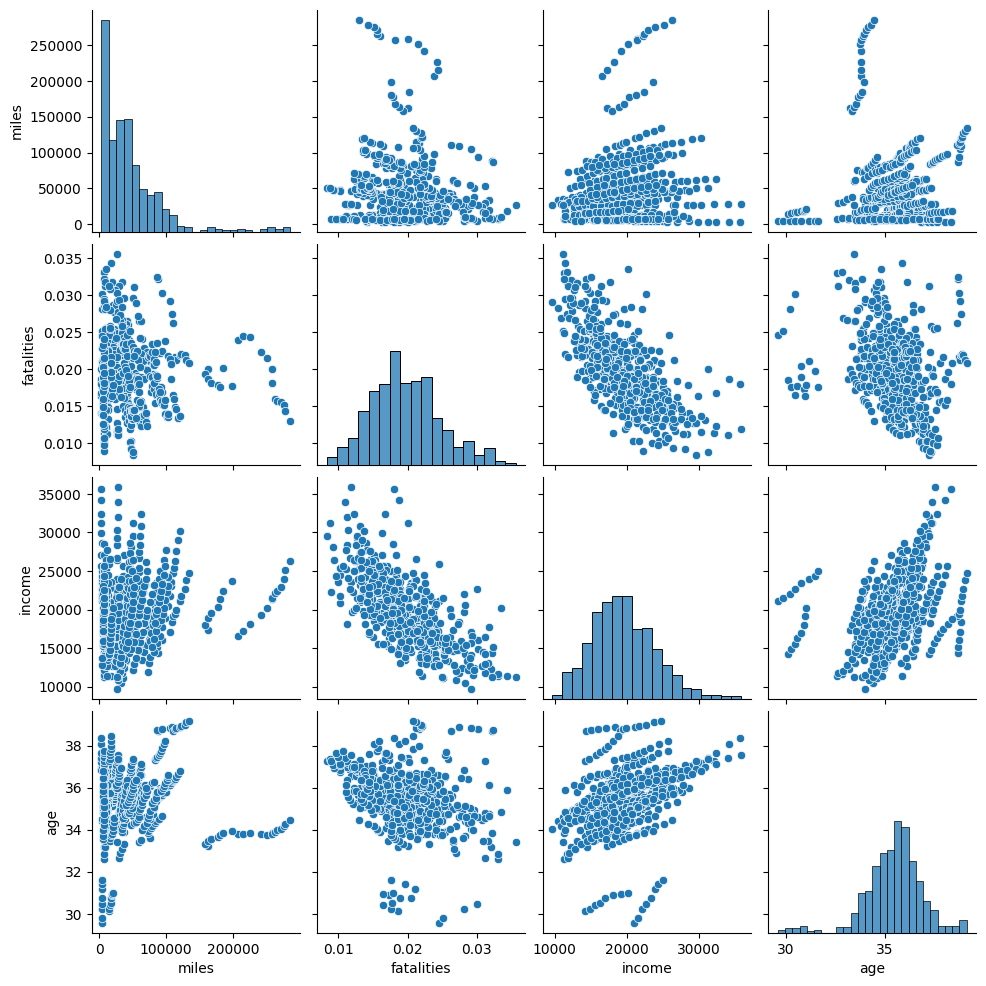

alcohol  enforce  
no       no           0.022431
         primary      0.019148
         secondary    0.019555
yes      no           0.016135
         primary      0.019565
         secondary    0.017112
Name: fatalities, dtype: float64
seatbelt     0.060     0.070     0.090     0.099     0.110     0.120  \
alcohol                                                                
no        0.029118  0.026976  0.024965  0.025214  0.022109  0.031211   
yes            NaN       NaN       NaN       NaN       NaN       NaN   

seatbelt     0.128     0.130     0.150     0.159  ...    0.830     0.831  \
alcohol                                           ...                      
no        0.035649  0.025801  0.022895  0.021653  ...      NaN  0.015993   
yes            NaN       NaN       NaN       NaN  ...  0.01823       NaN   

seatbelt     0.840     0.842     0.845     0.850     0.852     0.853  \
alcohol                                                                
no        0.014411  0.01

In [ ]:
#Step 8 – Multivariate Analysis
# Pairplot for numeric columns
sns.pairplot(df[numeric_cols])
plt.show()

# Groupby example
print(df.groupby(['alcohol', 'enforce'])['fatalities'].mean())

# Pivot table
print(pd.pivot_table(df, values='fatalities', index='alcohol', columns='seatbelt', aggfunc='mean'))
